In [2]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
from loadTDMS import *
from tqdm import tqdm

In [6]:
date = 20230117
interval = 8308

In [10]:
%matplotlib qt
num = 460
fig = plt.figure()
ax = fig.add_subplot()
d = np.load(rf"Z:\200 Produced_data\{date}\CF\max8308\{num}.npy")
# d = np.load(rf"Z:\200 Produced_data\{date}\CF\{num}.npy")
# ax.axhline(100, color = "red")
plt.plot(d)

460

## new-non_cutting_avg 使用

In [3]:
for num in tqdm(range(121,461)):
    d = np.load(rf"Z:\200 Produced_data\{date}\CF\{num}.npy")
    cf_max = np.array([])
    for rev in range(int(len(d)/interval)):
        start = rev*interval
        end = start + interval
        cf_max = np.append(cf_max, np.max(d[start:end]))
    np.save(rf"Z:\200 Produced_data\{date}\CF\max8308\{num}", cf_max)

100%|██████████| 340/340 [03:43<00:00,  1.52it/s]


In [5]:
d1 = np.load(rf"Z:\200 Produced_data\{date}\CF\max8308\121.npy")

for num in tqdm(range(122,461)):
    d2 = np.load(rf"Z:\200 Produced_data\{date}\CF\max8308\{num}.npy")
    d1 = np.concatenate([d1,d2], axis=0)
np.save(rf"Z:\200 Produced_data\{date}\CF\max8308\All",d1)

100%|██████████| 339/339 [00:10<00:00, 31.01it/s]


## non-cutting_avg 使用

In [14]:
d1 = np.load(rf"Z:\200 Produced_data\20230113\CF\max8308\1.npy")

for num in tqdm(range(2,121)):
    d2 = np.load(rf"Z:\200 Produced_data\20230113\CF\max8308\{num}.npy")
    d1 = np.concatenate([d1,d2], axis=0)
np.save(rf"Z:\200 Produced_data\20230113\CF\max8308\All",d1)

100%|██████████| 119/119 [00:03<00:00, 33.68it/s]


In [ ]:
d1 = np.load(rf"Z:\200 Produced_data\20230113\CF\max8308\1.npy")

for num in tqdm(range(2,121)):
    d2 = np.load(rf"Z:\200 Produced_data\20230113\CF\max8308\{num}.npy")
    d1 = np.concatenate([d1,d2], axis=0)
np.save(rf"Z:\200 Produced_data\20230113\CF\max8308\All",d1)

# １回転分のmaxの推移表示（移動平均）

In [14]:
all_d = np.load(rf"Z:\200 Produced_data\{date}\CF\max8308\All.npy")

%matplotlib qt
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xticks(np.arange(0, 340*1200+1, 1200*5))
ax.set_xticklabels(np.arange(121,460,5))
ax.set_xlabel(xlabel='Path Number')
ax.set_ylabel(ylabel='Cutting Force[N]')
ax.tick_params(axis = 'x')
ax.tick_params(axis = 'y')
ax.grid()

w_size = 1200*10
x = np.linspace(-1,1,w_size)
v = np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)
v = v / np.sum(v)
v = np.sort(v)[::-1]


plt.plot(all_d)
plt.plot(np.convolve(all_d,v, mode='valid'))

## ドリフト除去_20230113

In [62]:
# データがドリフトしているところ
drift_path = [24,25,26,33,34,44,53,72,73,82,99,101,120]

In [18]:
all_d = np.load(rf"Z:\200 Produced_data\20230113\CF\max8308\All.npy")

In [64]:
for i in drift_path:
    all_d[(i-1)*1200:(i-1)*1200+1200] = 200 + np.random.randint(-50,50,1200)
np.save(rf"Z:\200 Produced_data\20230113\CF\max8308\All_delete_drift.npy", all_d)

In [24]:
all_d_d = np.load(rf"Z:\200 Produced_data\20230113\CF\max8308\All_delete_drift.npy")

## ドリフト除去_20230117

In [70]:
# データがドリフトしているところ
drift_path = [68,193,194,204,227,249,266,297,316,332]

In [71]:
all_d = np.load(rf"Z:\200 Produced_data\20230117\CF\max8308\All.npy")

In [72]:
a = 0
for i in drift_path:
    a = a +  np.sum(all_d[(i-1)*1200:(i-1)*1200+1200])
print(a)
print(np.sum(all_d))
print(np.sum(all_d) - a)
print((np.sum(all_d) - a) / (330*1200))

5179178.282440186
118121549.57003784
112942371.28759766
285.20800830201426


In [79]:
for i in drift_path:
#     a = np.average(all_d[(i-5)*1200:(i)*1200])
#     b = np.average(all_d[(i)*1200:(i+5)*1200])
#     print(a)
#     print(b)
#     print((a+b)/2)
    print("-------------------------------------------")
#     all_d[(i)*1200:(i)*1200+1200] = 285.2 + np.random.randint(-80,80,1200)
    print(np.average(all_d[(i-1)*1200:(i-1)*1200+1200])*1.05)
    all_d[(i)*1200:(i)*1200+1200] = np.average(all_d[(i-1)*1200:(i-1)*1200+1200])*1.05 + np.random.randint(-90,90,1200)
np.save(rf"Z:\200 Produced_data\20230117\CF\max8308\All_delete_drift_2.npy", all_d)

-------------------------------------------
210.4596121749878
-------------------------------------------
250.82261624336243
-------------------------------------------
264.00599705553054
-------------------------------------------
268.21050845718383
-------------------------------------------
267.5998315563202
-------------------------------------------
262.45836231803895
-------------------------------------------
264.1651168956757
-------------------------------------------
270.77298547744755
-------------------------------------------
255.7623646297455
-------------------------------------------
285.01300059700014


In [80]:
all_d = np.load(rf"Z:\200 Produced_data\20230117\CF\max8308\All.npy")
all_d_d = np.load(rf"Z:\200 Produced_data\20230117\CF\max8308\All_delete_drift_2.npy")

In [82]:
%matplotlib qt
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xticks(np.arange(121, 460*1200+1, 1200*5))
ax.set_xticklabels(np.arange(121,461,5))
ax.set_xticks(np.arange(1, 340*1200+1, 1200*5))
ax.set_xticklabels(np.arange(1,341,5))
ax.set_xlabel(xlabel='Path Number')
ax.set_ylabel(ylabel='Cutting Force[N]')
ax.tick_params(axis = 'x')
ax.tick_params(axis = 'y')
ax.grid()

w_size = 1200*10
x = np.linspace(-1,1,w_size)
v = np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)
v = v / np.sum(v)
v = np.sort(v)[::-1]


# plt.plot(all_d)
# plt.plot(all_d_d)
plt.plot(np.convolve(all_d_d,v, mode='valid'))
# plt.plot(np.convolve(all_d,v, mode='same'))
# plt.plot(np.convolve(all_d,v, mode='full'))

## 20230113 + 0117

In [4]:
cf13 = np.load(rf"Z:\200 Produced_data\20230113+0117\CF\All_delete_drift.npy")
cf17 = np.load(rf"Z:\200 Produced_data\20230113+0117\CF\All_delete_drift_2.npy")

In [7]:
print(len(cf13)/1200)
print(len(cf17)/1200)

120.0
340.0


In [8]:
cf1317 = np.concatenate([cf13,cf17])

In [12]:
print(len(cf1317)/1200)

460.0


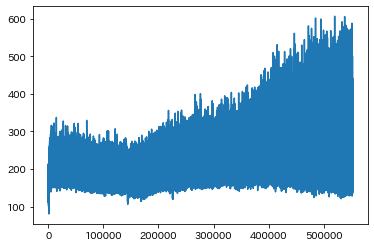

In [13]:
plt.plot(cf1317)

In [14]:
np.save(rf"Z:\200 Produced_data\20230113+0117\CF\All_delete_drift_460",cf1317)

# 1回転分のmaxを正規化して推移表示

In [30]:
from sklearn import preprocessing
all_d = np.load(rf"Z:\200 Produced_data\20230113\CF\max8308\All.npy")
all_d_norm = preprocessing.minmax_scale(all_d)
np.save(rf"Z:\200 Produced_data\20230113\CF\max8308\All_Norm.npy", all_d_norm)
all_d_norm = np.load(rf"Z:\200 Produced_data\20230113\CF\max8308\All_Norm.npy")

In [31]:
%matplotlib qt
fig = plt.figure()
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xticks(np.arange(0, 120*1200+1, 1200*5))
ax.set_xticklabels(np.arange(0,121,5))
ax.set_xlabel(xlabel='Path Number')
ax.set_ylabel(ylabel='Cutting Force[N]')
ax.tick_params(axis = 'x')
ax.tick_params(axis = 'y')
ax.grid()

w_size = 1200
x = np.linspace(-1,1,w_size)
v = np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)
v = v / np.sum(v)
v = np.sort(v)[::-1]

plt.plot(all_d_norm)
plt.plot(np.convolve(all_d_norm,v, mode='valid'))

In [4]:
date = 20221027
nc_path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Non-Cutting\Dynamo_1.tdms"
nc_d = load_tdms(nc_path, ch_num=3)
len(nc_d[1])

848148

In [19]:
def get_min_drift(num, start_sample_num, end_sample_num, interval, CALC, START, INTERVAL):
    date = 20220630
    path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
    nc_path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Non-Cutting\Dynamo_{num}.tdms"
    c_d = load_tdms(path, ch_num=3)
    c_d = np.array(c_d[1][start_sample_num:end_sample_num])
    nc_d = load_tdms(nc_path, ch_num=3)
    nc_d = nc_d[1]

    
    cf = ( c_d - np.average(nc_d) ) * -500
    
    cf_max = []
    
    for rev in range(0,int(len(c_d)/ interval)):
        start = rev*interval
        end = start + interval
        cf_max.append(np.max(cf[start:end]))
    cf_max = np.array(cf_max)
    np.save(rf"Z:\200 Produced_data\20220630\CF\{CALC}_{START}_{INTERVAL}{interval}_{num}",cf_max)

### MAX / None / Constant 4069 

In [21]:
CALC = "MAX"
START = "None"
INTERVAL = "Variable"
interval = 4069
for i in tqdm(range(260,737)):
#     get_min_drift(i, 0, 4930000, interval, CALC, START, INTERVAL)
    get_min_drift(i, 0, 4650000, interval, CALC, START, INTERVAL)
# get_min_drift(169, 0, 1000000, interval, CALC, START, INTERVAL)

100%|██████████| 477/477 [08:26<00:00,  1.06s/it]


In [2]:
CALC = "MAX"
START = "None"
INTERVAL = "Variable"
interval = 4069

d1 = np.load(rf"Z:\200 Produced_data\20221027\CF\rerecalculate\{CALC}_{START}_{INTERVAL}{interval}_1.npy")

for num in tqdm(range(2,170)):
    d2 = np.load(rf"Z:\200 Produced_data\20221027\CF\rerecalculate\{CALC}_{START}_{INTERVAL}{interval}_{num}.npy")
    d1 = np.concatenate([d1, d2], axis=0)

np.save(rf"Z:\200 Produced_data\20221027\CF\rerecalculate\{CALC}_{START}_{INTERVAL}{interval}_All",d1)

100%|██████████| 168/168 [00:04<00:00, 38.90it/s]


In [4]:
d1 = np.load(rf"Z:\200 Produced_data\20220630\CF\{CALC}_{START}_{INTERVAL}{interval}_1.npy")

for num in tqdm(range(2,737)):
    d2 = np.load(rf"Z:\200 Produced_data\20220630\CF\{CALC}_{START}_{INTERVAL}{interval}_{num}.npy")
    d1 = np.concatenate([d1, d2], axis=0)

np.save(rf"Z:\200 Produced_data\20220630\CF\{CALC}_{START}_{INTERVAL}{interval}_All",d1)

100%|██████████| 735/735 [00:12<00:00, 61.14it/s] 
